In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

import antoine
import water
import mmw

tmin = 1.0
dt   = 1.0

# %matplotlib widget


In [2]:
def write_csv(gas,ts,ps):
    X = np.array([ts,ps]).T 
    head = "T [K] , P_sat [Pa]"
    fpath = "sat/dat/%s_sat.csv"%gas 

    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

def write_tripcrit(gas, t_trip, t_crit):

    X = [t_trip]
    head = "T_trip [K]"
    fpath = "sat/dat/%s_trip.csv"%gas 
    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

    X = [t_crit]
    head = "T_crit [K]"
    fpath = "sat/dat/%s_crit.csv"%gas 
    np.savetxt(fpath, X, fmt="%.9e", delimiter=',', header=head)

In [3]:
# Main gases
for gas in antoine.gases.keys():
    print(gas)
    gdict = antoine.gases[gas]

    t_arr = np.arange(tmin, gdict["T_crit"], dt)
    t_arr = np.concatenate((t_arr, [gdict["T_crit"]]))
    p_arr = [antoine.evaluate(t, gdict) for t in t_arr]
    write_csv(gas, t_arr, p_arr)
    write_tripcrit(gas, gdict["T_trip"], gdict["T_crit"])

    print("    ok")


NH3
    ok
CO2
    ok
CH4
    ok
H2
    ok
N2
    ok
SO2
    ok
N2O
    ok
O2
    ok
H2S
    ok
O3
    ok


In [4]:
# Water
t_arr = np.arange(tmin, water.T_crit, dt)
t_arr = np.concatenate((t_arr, [water.T_crit]))
arr_p = [water.psat_both(t) for t in t_arr]

write_csv("H2O",t_arr, arr_p)
write_tripcrit("H2O", water.T_trip, water.T_crit)

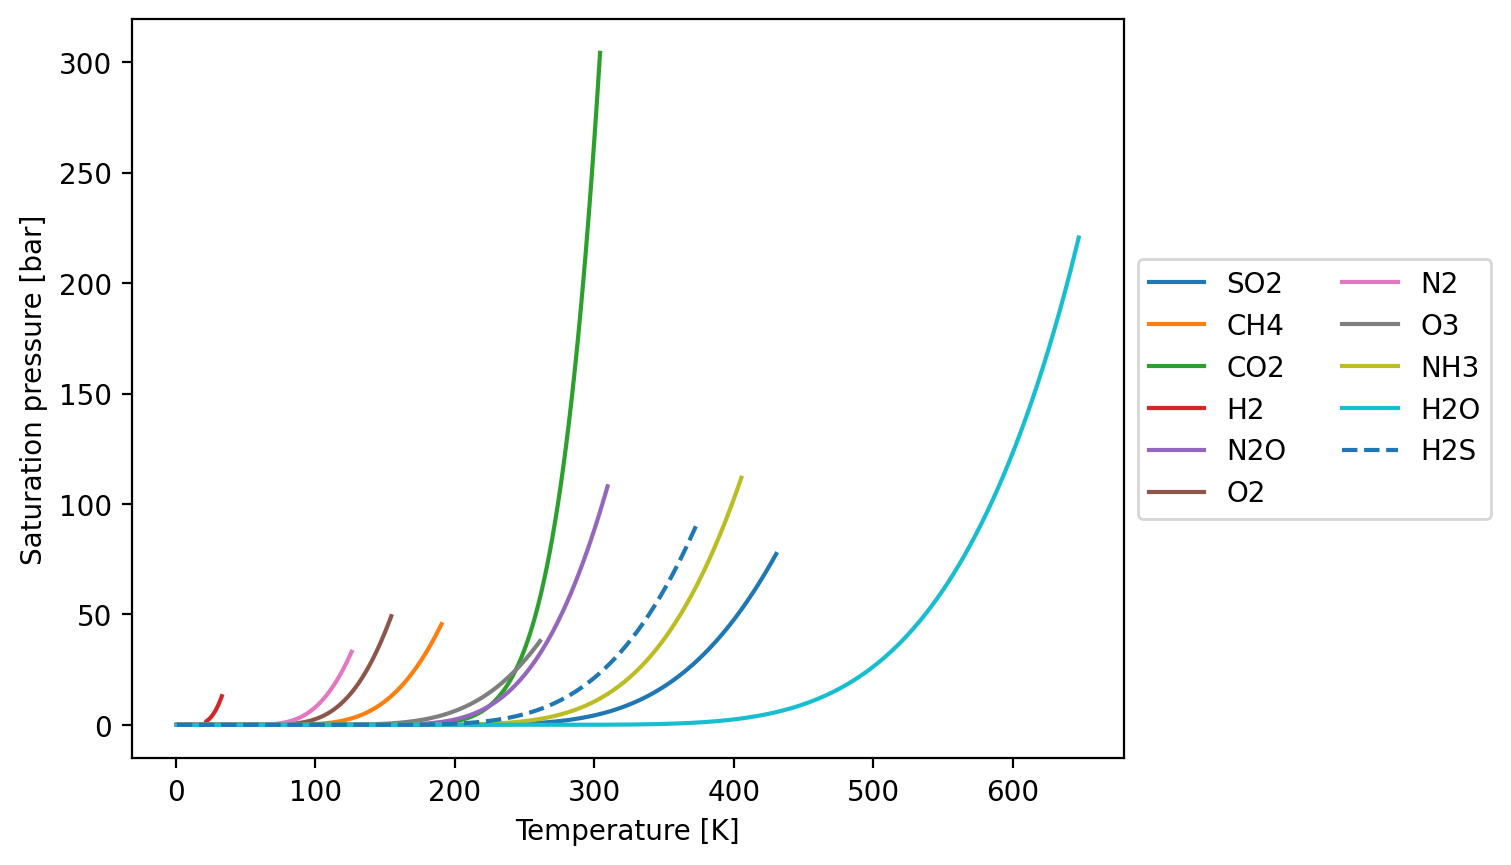

In [8]:
plt.close("all")


fig,ax = plt.subplots(1,1)

files = glob.glob("sat/dat/*_sat.csv")

for i,f in enumerate(files):
    form = mmw.formula_from_path(f).split("_")[0]
    data = np.loadtxt(f, delimiter=',').T

    ls='solid'
    if i > 9:
        ls='dashed'
    if i > 18:
        ls='dotted'

    l = ax.plot(data[0], data[1]*1e-5, label=form, ls=ls, zorder=3)[0]

    # c = l.get_color()
    # T_trip = np.loadtxt("sat/dat/%s_trip.csv"%form)
    # P_trip = np.argmin(np.abs(data[0]-T_trip))
    # P_trip = data[1][P_trip]*1e-5
    # ax.scatter(T_trip,P_trip, c=c, alpha=0.5)

ax.set(xlabel="Temperature [K]", ylabel="Saturation pressure [bar]")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2)

# ax.set_yscale("log")
# ax.set_ylim(bottom=1e-4)

plt.show()